In [1]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.0/882.0 kB 33.2 MB/s eta 0:00:00


In [3]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.5 MB/s eta 0:00:00


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR-API-KEY")
project = rf.workspace("brain-mri").project("mri-rskcu")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dependency ultralytics==8.0.196 is required but found version=8.3.6, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to MRI-3 in yolov8:: 100%|██████████| 2015/2015 [00:00<00:00, 6926.43it/s]


##Don't forget to change the training, validation, and test paths in the `data.yaml` file.

In [5]:
! yolo task=detect mode=train batch=32 model=yolov10n.pt data='/content/MRI-3/data.yaml' epochs=50 plots=True

100% 5.59M/5.59M [00:00<00:00, 186MB/s]
Ultralytics 8.3.6 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/MRI-3/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

In [6]:
from ultralytics import YOLO

model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

result = model(source = "/content/MRI-3/valid/images", conf = 0.25, save=True)


image 1/151 /content/MRI-3/valid/images/Tr-glTr_0000_jpg.rf.ee4ad3ca5d0eafd1f482988b89457634.jpg: 640x640 1 Brain-Tumor, 14.2ms
image 2/151 /content/MRI-3/valid/images/Tr-gl_0021_jpg.rf.82e37d9cdf73ab894e8af3cd4bfb70a8.jpg: 640x640 2 Brain-Tumors, 17.9ms
image 3/151 /content/MRI-3/valid/images/Tr-gl_0119_jpg.rf.0768b25ee8d4e0aa20df53673dce853e.jpg: 640x640 2 Brain-Tumors, 13.0ms
image 4/151 /content/MRI-3/valid/images/Tr-gl_0228_jpg.rf.b9ecef834d39f770e41b0585b63bdc1a.jpg: 640x640 (no detections), 15.7ms
image 5/151 /content/MRI-3/valid/images/Tr-gl_0342_jpg.rf.10e62693351dae5f8b8f0e136c8ec8c3.jpg: 640x640 2 eyes, 18.4ms
image 6/151 /content/MRI-3/valid/images/Tr-gl_0493_jpg.rf.4393a755ad877b333ee635f7d8625687.jpg: 640x640 1 Brain-Tumor, 17.1ms
image 7/151 /content/MRI-3/valid/images/Tr-gl_0565_jpg.rf.4975825d65539d7d35caf0f61517f236.jpg: 640x640 2 Brain-Tumors, 18.4ms
image 8/151 /content/MRI-3/valid/images/Tr-gl_0585_jpg.rf.eeb0b7c0f19a6763494b9e53fee546db.jpg: 640x640 1 Brain-Tumor

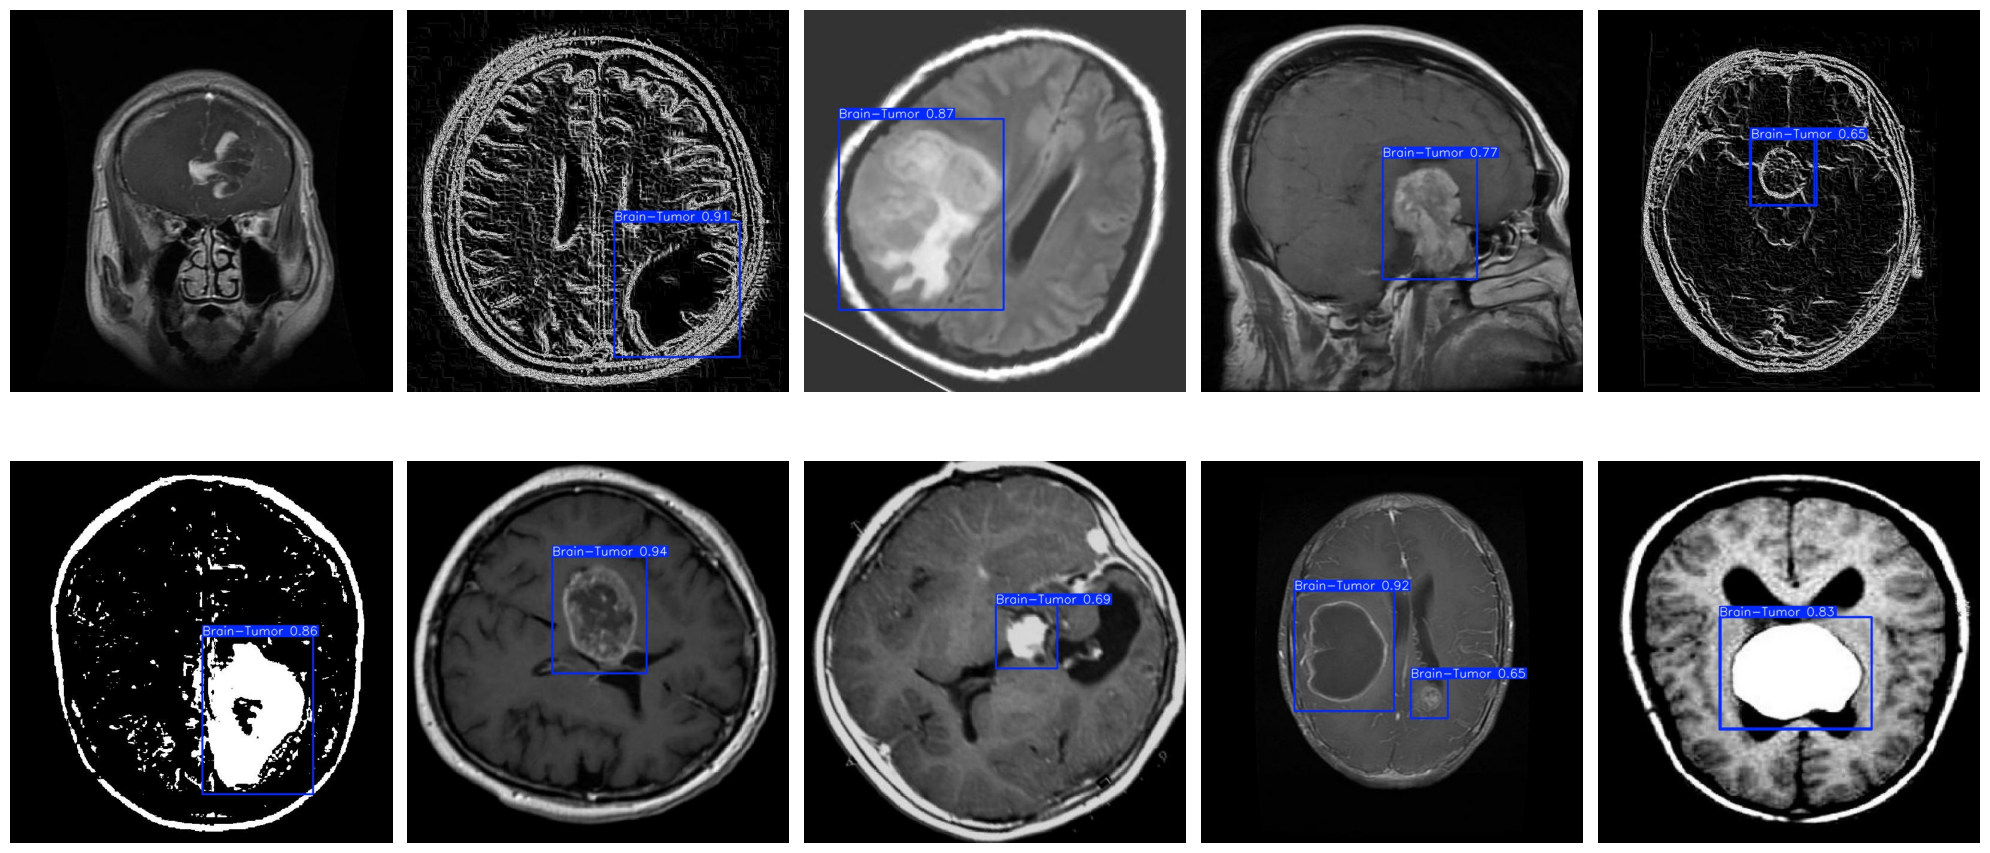

In [11]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = glob.glob("/content/runs/detect/predict/*.jpg")

images_to_display = images[:10]

fig, axes = plt.subplots(2,5, figsize=(20,10))

for i, ax in enumerate(axes.flat):
  if i < len(images_to_display):
    img = mpimg.imread(images_to_display[i])
    ax.imshow(img)
    ax.axis('off')
  else:
    ax.axis('off')
plt.tight_layout()
plt.show()


image 1/1 /content/runs/detect/predict/Tr-pi_0279_jpg.rf.1244e9008d4ec2b087c09c66122d60f5.jpg: 640x640 1 Brain-Tumor, 23.5ms
Speed: 2.4ms preprocess, 23.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
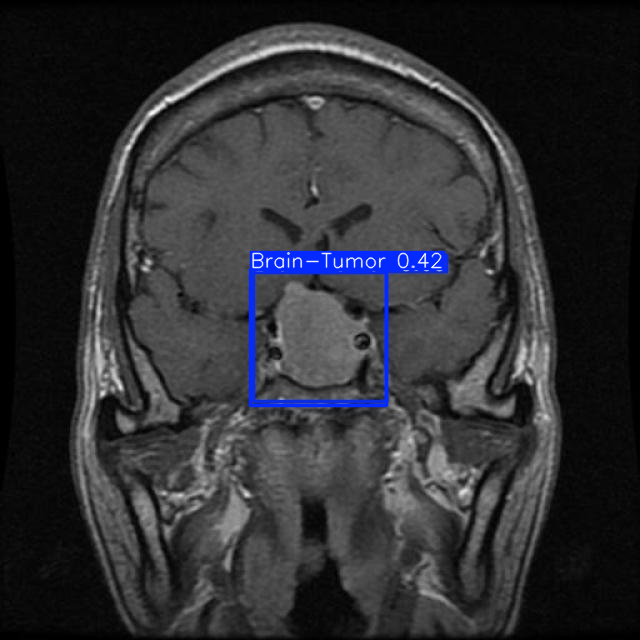

In [12]:
result = model.predict(source = "/content/runs/detect/predict/Tr-pi_0279_jpg.rf.1244e9008d4ec2b087c09c66122d60f5.jpg", imgsz = 640, conf = 0.25)
annotated_img = result[0].plot()
annotated_img[:, :, ::-1]

In [13]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.6 MB/s eta 0:00:00


In [14]:
import gradio as gr
import cv2
import numpy as np

def predict(image):
  result = model.predict(source=image, imgsz = 640, conf = 0.25)
  annotated_img = result[0].plot()
  annotated_img = annotated_img[:, :, ::-1]
  return annotated_img

app = gr.Interface(
    fn =predict,
    inputs = gr.Image(type="numpy", label="Upload an image"),
    outputs = gr.Image(type="numpy", label="Detect Brain Tumor"),
    title = "Brain Tumor Detection Using Yolov10",
    description="Upload an image and the yolov10 model will detect and annotated brain tumor"
)

app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://df64bc56f9411f4abf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
